## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

In [1]:
! git clone https://github.com/vrhughes/knn

Cloning into 'knn'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 84 (delta 35), reused 14 (delta 14), pack-reused 39 (from 1)
Receiving objects: 100% (84/84), 14.63 MiB | 8.50 MiB/s, done.
Resolving deltas: 100% (39/39), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

**Q1.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [3]:
# Question 1 Part 1
cars = pd.read_csv('./knn/data/USA_cars_datasets.csv', low_memory=False)
cars = cars[['price', 'year', 'mileage']]
price = cars['price'] # variable vector
year = cars['year']
mileage = cars['mileage']
# looking at values, making sure not overwhelming amount of bad data
print(price.value_counts(), '\n')
print(mileage.value_counts(), '\n')
print(year.value_counts(), '\n')
print(cars.shape, '\n')


price
0        43
16500    26
13900    21
15500    19
15000    19
         ..
12560     1
11760     1
7340      1
6530      1
30100     1
Name: count, Length: 790, dtype: int64 

mileage
1        11
0         6
31727     2
33808     2
21774     2
         ..
90685     1
54141     1
82240     1
66167     1
31371     1
Name: count, Length: 2439, dtype: int64 

year
2019    892
2018    395
2017    377
2016    203
2015    196
2014    104
2013     86
2012     72
2020     48
2011     23
2008     18
2010     13
2009     11
2003      9
2006      8
2004      6
2007      6
2005      6
2001      5
1998      4
2000      4
2002      2
1994      2
1997      2
1996      2
1973      1
1999      1
1984      1
1995      1
1993      1
Name: count, dtype: int64 

(2499, 3) 



In [4]:
# adding maxmin func from notes
def maxmin(z):
    w = (z-np.min(z))/(np.max(z)-np.min(z))
    return w

In [5]:
# Question 1 Part 2
feature = cars.loc[:, ['year', 'mileage']] # feature matrix
feature = feature.apply(maxmin)
feature.head()
feature.describe()

,year,mileage
count,2499.000000,2499.000000
mean,0.930091,0.051377
std,0.073248,0.058654
min,0.000000,0.000000
25%,0.914894,0.021088
50%,0.957447,0.034742
75%,0.978723,0.062354
max,1.000000,1.000000


In [6]:
# Question 1 Part 3: splitting data
X_train, X_test, y_train, y_test = train_test_split(feature, price, test_size=0.2, random_state=100)

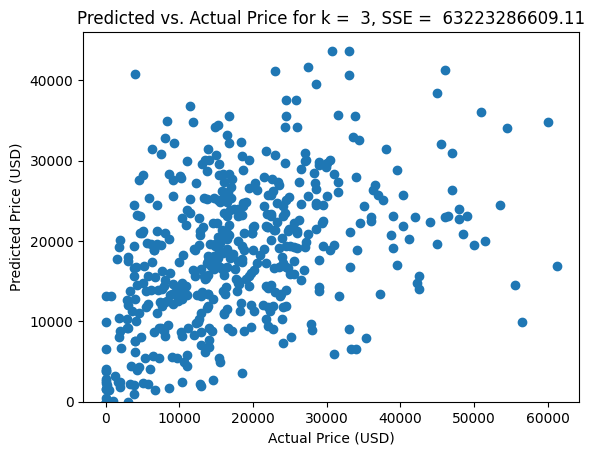

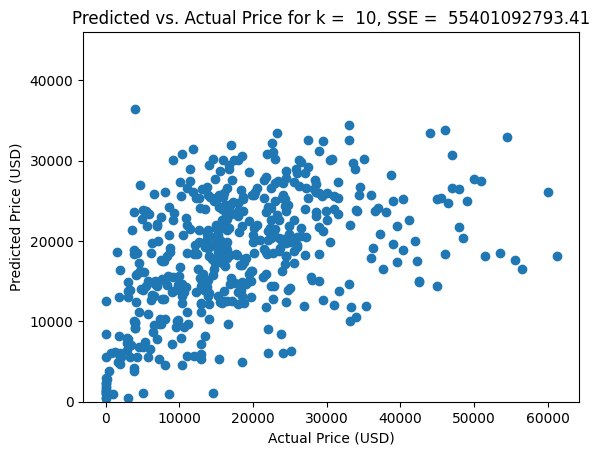

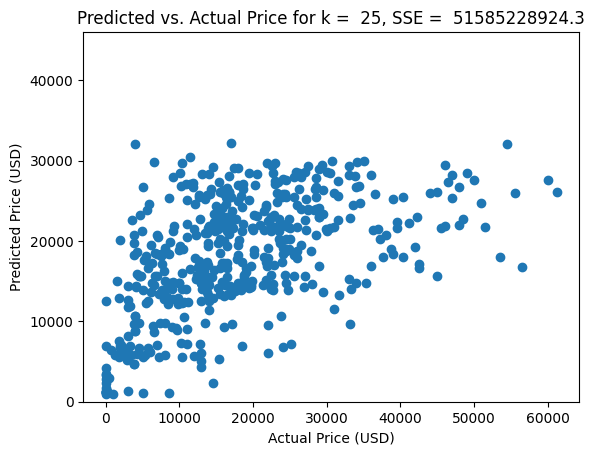

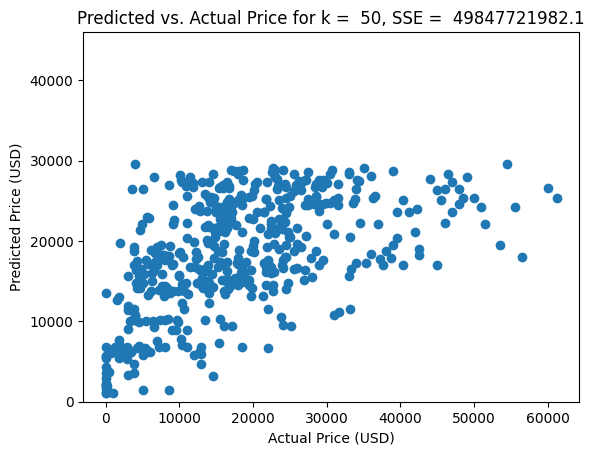

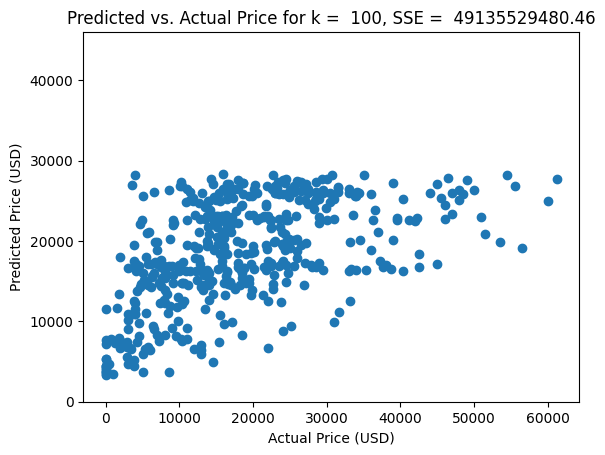

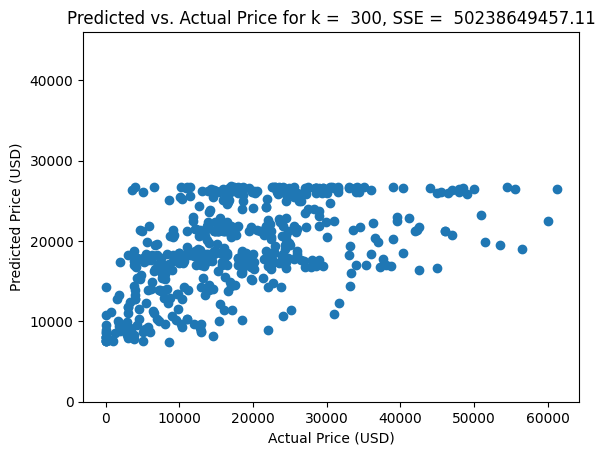

The optimal val of k is:  [5]


In [10]:
# Question 1 Part 4-5: Use the  kNN algorithm and the training data to predict price using year and mileage for the test set for  k=3,10,25,50,100,300
# For each value of  k, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value.
# What patterns do you notice as you increase  k?

k_bar = [3, 10, 25, 50, 100, 300]
SSE = np.zeros(len(k_bar))
SSE_on_train = np.zeros(len(k_bar))

for k in range(len(k_bar)):
    model = KNeighborsRegressor(n_neighbors=k_bar[k]) # if pulling list[index] DO NOT ADD 1
    fitted = model.fit(X_train, y_train)
    y_hat = fitted.predict(X_test) # predict vals for test set
    SSE[k] = np.sum( (y_hat-y_test)**2 ) # save computed SEE for test set

    fig, axes = plt.subplots()
    plt.scatter(y_test,y_hat)

    plt.xlabel('Actual Price (USD)')
    plt.ylabel('Predicted Price (USD)')
    rounded_SSE = round(SSE[k],2) # Rounding SSE to the hundredths place
    plt.title('Predicted vs. Actual Price for k =  ' + str(k_bar[k]) + ', SSE =  ' + str(rounded_SSE))
    plt.ylim(0,46000)
    plt.show()

SSE_min = np.min(SSE)
min_index = np.where(SSE == SSE_min)
k_star = min_index[0]+1
print('The optimal val of k is: ', k_star)

# huzzah, now we gotta make some graphs !!


In [ ]:
# Question 1 Part 5

**Q2.** This question is a case study for $k$ nearest neighbor. The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.